### 필수과제1 
- 시계열데이터 문법
- offsets, first 직장인들 일하는 근로기준날, 첫 번째 월요일 등 추출 가능
- 구글링 하셔서 유용한 문법들을 최소 5개 이상 공유!

In [266]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [267]:
import pandas as pd
filepath = '/content/drive/MyDrive/Colab Notebooks/BDAA 학회/데이터셋/crime.csv'
crime = pd.read_csv(filepath)

In [268]:
crime

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...,...
460906,460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0


In [269]:
crime.info() # REPORTED_DATE 가 object 로 저장되어 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           460911 non-null  int64  
 1   OFFENSE_TYPE_ID      460911 non-null  object 
 2   OFFENSE_CATEGORY_ID  460911 non-null  object 
 3   REPORTED_DATE        460911 non-null  object 
 4   GEO_LON              457296 non-null  float64
 5   GEO_LAT              457296 non-null  float64
 6   NEIGHBORHOOD_ID      460911 non-null  object 
 7   IS_CRIME             460911 non-null  int64  
 8   IS_TRAFFIC           460911 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 31.6+ MB


#### 날짜 파싱(parsing)
- 문자 -> 날짜
- datetime.strptime (string parsing time)
- pd.to_datetiime
- datetime

In [270]:
# datetime.strptime
today = '2023/02/14'
today_1 = datetime.strptime(today, '%Y/%m/%d') # 문자열 형식에 맞추어 문자열을 날짜형식으로 변환

In [271]:
print(today_1)

2023-02-14 00:00:00


In [272]:
type(today_1)

datetime.datetime

In [273]:
today_ = '2023-02-14'
today_2 = datetime.strptime(today_, '%Y-%m-%d') # 마찬가지로 문자열 형식에 맞추어 문자열을 날짜형식으로 변환

In [274]:
print(today_2)

2023-02-14 00:00:00


In [275]:
# pd.to_datetime
day_list = ['2023/02/11', '2023/02/12', '2023/02/13', '2023/02/14']
day = pd.to_datetime(day_list, format = '%Y/%m/%d') # 문자형을 날짜 형식으로 지정될 때 원하는 형식을 입력하여 변환

In [276]:
print(day)

DatetimeIndex(['2023-02-11', '2023-02-12', '2023-02-13', '2023-02-14'], dtype='datetime64[ns]', freq=None)


In [277]:
day_ = pd.to_datetime(day_list, format = '%Y-%m-%d') # 마찬가지로 문자형을 날짜 형식으로 지정될 때 원하는 형식을 입력하여 변환

In [278]:
print(day_)

DatetimeIndex(['2023-02-11', '2023-02-12', '2023-02-13', '2023-02-14'], dtype='datetime64[ns]', freq=None)


In [279]:
crime['REPORTED_DATE'] = pd.to_datetime(crime['REPORTED_DATE'])
crime.info() # datetime64 형식으로 바뀐 것을 확인할 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           460911 non-null  int64         
 1   OFFENSE_TYPE_ID      460911 non-null  object        
 2   OFFENSE_CATEGORY_ID  460911 non-null  object        
 3   REPORTED_DATE        460911 non-null  datetime64[ns]
 4   GEO_LON              457296 non-null  float64       
 5   GEO_LAT              457296 non-null  float64       
 6   NEIGHBORHOOD_ID      460911 non-null  object        
 7   IS_CRIME             460911 non-null  int64         
 8   IS_TRAFFIC           460911 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 31.6+ MB


#### datetime
- 날짜 표현

In [280]:
from datetime import datetime
today = datetime.now() # 현재 날짜와 시간을 반환해주는 메서드

In [281]:
print(today.year)
print(today.month)
print(today.day)
print(today.hour)
print(today.minute)
print(today.second) # 각각의 메서드를 이용해 년도, 월, 날짜, 시간, 분, 초를 따로 출력할 수 있음

2023
2
17
8
2
38


In [282]:
# crime['REPORTED_DATE'].year() # 시리즈에 적용불가

In [283]:
crime['REPORTED_DATE'].map(lambda x : x.year) # map 함수를 이용하여 적용

0         2014
1         2014
2         2014
3         2014
4         2014
          ... 
460906    2017
460907    2017
460908    2017
460909    2017
460910    2017
Name: REPORTED_DATE, Length: 460911, dtype: int64

In [284]:
crime['REPORTED_DATE'].map(lambda x : x.minute)

0          1
1         54
2          0
3         18
4         17
          ..
460906    48
460907    37
460908    32
460909     4
460910    30
Name: REPORTED_DATE, Length: 460911, dtype: int64

#### strftime (string format time)
- 날짜 -> 문자
- 메서드, 함수 형식 모두 가능

In [285]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           460911 non-null  int64         
 1   OFFENSE_TYPE_ID      460911 non-null  object        
 2   OFFENSE_CATEGORY_ID  460911 non-null  object        
 3   REPORTED_DATE        460911 non-null  datetime64[ns]
 4   GEO_LON              457296 non-null  float64       
 5   GEO_LAT              457296 non-null  float64       
 6   NEIGHBORHOOD_ID      460911 non-null  object        
 7   IS_CRIME             460911 non-null  int64         
 8   IS_TRAFFIC           460911 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 31.6+ MB


In [286]:
### datetime.strftime(crime['REPORTED_DATE'], '%Y/%m/%d') # strftime은 시리즈에 적용 불가

In [287]:
crime['REPORTED_DATE'].map(lambda x : datetime.strftime(x, '%Y/%m/%d')) # map 함수를 이용해서 적용하면 됨

0         2014/06/29
1         2014/06/29
2         2014/06/29
3         2014/06/29
4         2014/06/29
             ...    
460906    2017/09/13
460907    2017/09/12
460908    2017/09/12
460909    2017/09/12
460910    2017/09/12
Name: REPORTED_DATE, Length: 460911, dtype: object

In [288]:
crime['REPORTED_DATE'].map(lambda x : datetime.strftime(x, '%Y-%m-%d')) # 원하는 형식으로 저장할 수 있음

0         2014-06-29
1         2014-06-29
2         2014-06-29
3         2014-06-29
4         2014-06-29
             ...    
460906    2017-09-13
460907    2017-09-12
460908    2017-09-12
460909    2017-09-12
460910    2017-09-12
Name: REPORTED_DATE, Length: 460911, dtype: object

In [289]:
crime['REPORTED_DATE'].map(lambda x : datetime.strftime(x, '%A')) # '%A' 형식은 해당하는 날짜의 요일을 반환해줌

0            Sunday
1            Sunday
2            Sunday
3            Sunday
4            Sunday
            ...    
460906    Wednesday
460907      Tuesday
460908      Tuesday
460909      Tuesday
460910      Tuesday
Name: REPORTED_DATE, Length: 460911, dtype: object

In [290]:
crime_year = crime['REPORTED_DATE'].map(lambda x : x.year)
crime_month = crime['REPORTED_DATE'].map(lambda x : x.month)
crime_day = crime['REPORTED_DATE'].map(lambda x : x.day)

In [291]:
REPORTED_DAY = pd.DataFrame(map(lambda x, y ,z : datetime(x, y, z).strftime('%A'), crime_year, crime_month, crime_day), columns = ['REPORTED_DAY']) 
# 년도와 월 일이 따로 있다고 가정하고 요일을 반환하는 방법

In [292]:
REPORTED_DAY

,REPORTED_DAY
0,Sunday
1,Sunday
2,Sunday
3,Sunday
4,Sunday
...,...
460906,Wednesday
460907,Tuesday
460908,Tuesday
460909,Tuesday


In [293]:
crime_day = pd.merge(crime, REPORTED_DAY, left_index = True, right_index = True) # 두 개의 데이터프레임을 인덱스 기준으로 합침

In [294]:
crime_df = crime_day.set_index('REPORTED_DATE') # 날짜 형식인 REPORTED_DATE 컬럼을 인덱스로 지정

In [295]:
crime_df

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DAY
REPORTED_DATE,,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1,Sunday
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0,Sunday
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0,Sunday
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0,Sunday
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0,Sunday
...,...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0,Wednesday
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0,Tuesday
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0,Tuesday


In [296]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 460911 entries, 2014-06-29 02:01:00 to 2017-09-12 09:30:00
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           460911 non-null  int64  
 1   OFFENSE_TYPE_ID      460911 non-null  object 
 2   OFFENSE_CATEGORY_ID  460911 non-null  object 
 3   GEO_LON              457296 non-null  float64
 4   GEO_LAT              457296 non-null  float64
 5   NEIGHBORHOOD_ID      460911 non-null  object 
 6   IS_CRIME             460911 non-null  int64  
 7   IS_TRAFFIC           460911 non-null  int64  
 8   REPORTED_DAY         460911 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 35.2+ MB


#### 날짜 연산
- timedelta
- offsets

In [297]:
# timedelta
t1 = datetime(2023, 2, 13)
t2 = datetime(2023, 2, 4)

In [298]:
diff_time = t1 - t2  # 두 개의 날짜 연산이 가능

In [299]:
diff_time.days # 계산한 시간의 날짜를 반환, timedelta에서는 day가 아닌 days 임에 유의

9

In [300]:
diff_time.seconds # 마찬가지로 second가 아닌 seconds 임에 유의

0

In [301]:
from datetime import timedelta

In [302]:
today = datetime.now()
pd.to_datetime(today)

Timestamp('2023-02-17 08:02:59.321826')

In [303]:
### today + 100 

In [304]:
today + timedelta(100) # 오늘 날짜에 100일 후를 출력

datetime.datetime(2023, 5, 28, 8, 2, 59, 321826)

In [305]:
crime['REPORTED_DATE'] + timedelta(100) # REPORTED_DATE 컬럼에 100일씩 더하여 출력

0        2014-10-07 02:01:00
1        2014-10-07 01:54:00
2        2014-10-07 02:00:00
3        2014-10-07 02:18:00
4        2014-10-07 04:17:00
                 ...        
460906   2017-12-22 05:48:00
460907   2017-12-21 20:37:00
460908   2017-12-21 16:32:00
460909   2017-12-21 13:04:00
460910   2017-12-21 09:30:00
Name: REPORTED_DATE, Length: 460911, dtype: datetime64[ns]

In [306]:
# offsets
import pandas.tseries.offsets
from pandas.tseries.offsets import Day, Hour, Second

In [307]:
today

datetime.datetime(2023, 2, 17, 8, 2, 59, 321826)

In [308]:
today + Hour(100) # 오늘 날짜로부터 100시간 후의 시간을 구해줌

Timestamp('2023-02-21 12:02:59.321826')

In [309]:
crime['REPORTED_DATE'] + Hour(23) # REPORTED_DATE 컬럼의 23시간 후의 날짜를 출력

0        2014-06-30 01:01:00
1        2014-06-30 00:54:00
2        2014-06-30 01:00:00
3        2014-06-30 01:18:00
4        2014-06-30 03:17:00
                 ...        
460906   2017-09-14 04:48:00
460907   2017-09-13 19:37:00
460908   2017-09-13 15:32:00
460909   2017-09-13 12:04:00
460910   2017-09-13 08:30:00
Name: REPORTED_DATE, Length: 460911, dtype: datetime64[ns]

In [310]:
crime['REPORTED_DATE'] + Day(100) # REPORTED_DATE 컬럼의 23시간 후의 날짜를 출력

0        2014-10-07 02:01:00
1        2014-10-07 01:54:00
2        2014-10-07 02:00:00
3        2014-10-07 02:18:00
4        2014-10-07 04:17:00
                 ...        
460906   2017-12-22 05:48:00
460907   2017-12-21 20:37:00
460908   2017-12-21 16:32:00
460909   2017-12-21 13:04:00
460910   2017-12-21 09:30:00
Name: REPORTED_DATE, Length: 460911, dtype: datetime64[ns]

In [311]:
(crime['REPORTED_DATE'] + Day(100)).map(lambda x : datetime.strftime(x, '%A')) # REPORTED_DATE 컬럼의 100일 뒤의 요일을 구해주는 함수

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
460906      Friday
460907    Thursday
460908    Thursday
460909    Thursday
460910    Thursday
Name: REPORTED_DATE, Length: 460911, dtype: object

In [312]:
today - crime['REPORTED_DATE'] # 두 날짜의 형식이 동일하기 때문에 차이 계산 가능

0        3155 days 06:01:59.321826
1        3155 days 06:08:59.321826
2        3155 days 06:02:59.321826
3        3155 days 05:44:59.321826
4        3155 days 03:45:59.321826
                    ...           
460906   1983 days 02:14:59.321826
460907   1983 days 11:25:59.321826
460908   1983 days 15:30:59.321826
460909   1983 days 18:58:59.321826
460910   1983 days 22:32:59.321826
Name: REPORTED_DATE, Length: 460911, dtype: timedelta64[ns]

In [313]:
(today - crime['REPORTED_DATE']).map(lambda x : x.days) # 두 날짜의 차이 중 일수의 차이를 반환

0         3155
1         3155
2         3155
3         3155
4         3155
          ... 
460906    1983
460907    1983
460908    1983
460909    1983
460910    1983
Name: REPORTED_DATE, Length: 460911, dtype: int64

#### pd.date_range
- 연속적 날짜 출력

In [314]:
pd.date_range('2022/02/14', '2023/02/14', periods = 100 ) # 2022년 2월 14일부터 2023년 2월 14일까지 초단위까지 동일한 간격으로 100일을 출력

DatetimeIndex([          '2022-02-14 00:00:00',
               '2022-02-17 16:29:05.454545454',
               '2022-02-21 08:58:10.909090909',
               '2022-02-25 01:27:16.363636363',
               '2022-02-28 17:56:21.818181818',
               '2022-03-04 10:25:27.272727272',
               '2022-03-08 02:54:32.727272727',
               '2022-03-11 19:23:38.181818182',
               '2022-03-15 11:52:43.636363636',
               '2022-03-19 04:21:49.090909091',
               '2022-03-22 20:50:54.545454545',
                         '2022-03-26 13:20:00',
               '2022-03-30 05:49:05.454545455',
               '2022-04-02 22:18:10.909090909',
               '2022-04-06 14:47:16.363636364',
               '2022-04-10 07:16:21.818181818',
               '2022-04-13 23:45:27.272727273',
               '2022-04-17 16:14:32.727272728',
               '2022-04-21 08:43:38.181818182',
               '2022-04-25 01:12:43.636363637',
               '2022-04-28 17:41:49.0909

In [315]:
pd.date_range('2022/02/14', periods = 100 ) # 2022월 2월 14일 이후 100일 날짜를 출력

DatetimeIndex(['2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
               '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21',
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
               '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01',
               '2022-03-02', '2022-03-03', '2022-03-04', '2022-03-05',
               '2022-03-06', '2022-03-07', '2022-03-08', '2022-03-09',
               '2022-03-10', '2022-03-11', '2022-03-12', '2022-03-13',
               '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17',
               '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21',
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29',
               '2022-03-30', '2022-03-31', '2022-04-01', '2022-04-02',
               '2022-04-03', '2022-04-04', '2022-04-05', '2022-04-06',
               '2022-04-07', '2022-04-08', '2022-04-09', '2022-04-10',
      

In [316]:
pd.date_range('2022/02/14', '2023/02/14', freq = '7D' ) # 2022년 2월 14일부터 2023년 2월 14일까지 7일 간격으로 출력

DatetimeIndex(['2022-02-14', '2022-02-21', '2022-02-28', '2022-03-07',
               '2022-03-14', '2022-03-21', '2022-03-28', '2022-04-04',
               '2022-04-11', '2022-04-18', '2022-04-25', '2022-05-02',
               '2022-05-09', '2022-05-16', '2022-05-23', '2022-05-30',
               '2022-06-06', '2022-06-13', '2022-06-20', '2022-06-27',
               '2022-07-04', '2022-07-11', '2022-07-18', '2022-07-25',
               '2022-08-01', '2022-08-08', '2022-08-15', '2022-08-22',
               '2022-08-29', '2022-09-05', '2022-09-12', '2022-09-19',
               '2022-09-26', '2022-10-03', '2022-10-10', '2022-10-17',
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26', '2023-01-02', '2023-01-09',
               '2023-01-16', '2023-01-23', '2023-01-30', '2023-02-06',
               '2023-02-13'],
              dtype='datetime64[ns]', freq='7D'

In [317]:
pd.date_range('2022/02/14', '2023/02/14', freq = 'W' ) # 2022년 2월 14일부터 2023년 2월 14일까지 매주 일요일 날짜 출력

DatetimeIndex(['2022-02-20', '2022-02-27', '2022-03-06', '2022-03-13',
               '2022-03-20', '2022-03-27', '2022-04-03', '2022-04-10',
               '2022-04-17', '2022-04-24', '2022-05-01', '2022-05-08',
               '2022-05-15', '2022-05-22', '2022-05-29', '2022-06-05',
               '2022-06-12', '2022-06-19', '2022-06-26', '2022-07-03',
               '2022-07-10', '2022-07-17', '2022-07-24', '2022-07-31',
               '2022-08-07', '2022-08-14', '2022-08-21', '2022-08-28',
               '2022-09-04', '2022-09-11', '2022-09-18', '2022-09-25',
               '2022-10-02', '2022-10-09', '2022-10-16', '2022-10-23',
               '2022-10-30', '2022-11-06', '2022-11-13', '2022-11-20',
               '2022-11-27', '2022-12-04', '2022-12-11', '2022-12-18',
               '2022-12-25', '2023-01-01', '2023-01-08', '2023-01-15',
               '2023-01-22', '2023-01-29', '2023-02-05', '2023-02-12'],
              dtype='datetime64[ns]', freq='W-SUN')

In [318]:
pd.date_range('2022/02/14', '2023/02/14', freq = 'W-WED' ) # 2022년 2월 14일부터 2023년 2월 14일까지 매주 수요일 날짜 출력

DatetimeIndex(['2022-02-16', '2022-02-23', '2022-03-02', '2022-03-09',
               '2022-03-16', '2022-03-23', '2022-03-30', '2022-04-06',
               '2022-04-13', '2022-04-20', '2022-04-27', '2022-05-04',
               '2022-05-11', '2022-05-18', '2022-05-25', '2022-06-01',
               '2022-06-08', '2022-06-15', '2022-06-22', '2022-06-29',
               '2022-07-06', '2022-07-13', '2022-07-20', '2022-07-27',
               '2022-08-03', '2022-08-10', '2022-08-17', '2022-08-24',
               '2022-08-31', '2022-09-07', '2022-09-14', '2022-09-21',
               '2022-09-28', '2022-10-05', '2022-10-12', '2022-10-19',
               '2022-10-26', '2022-11-02', '2022-11-09', '2022-11-16',
               '2022-11-23', '2022-11-30', '2022-12-07', '2022-12-14',
               '2022-12-21', '2022-12-28', '2023-01-04', '2023-01-11',
               '2023-01-18', '2023-01-25', '2023-02-01', '2023-02-08'],
              dtype='datetime64[ns]', freq='W-WED')

###### freq에 전달
- D : 매일
- MS : 매월 1일
- M : 매월 말일
- BMS (BusinessMonthBegin) : 매월 영업일 첫 날 (평일 기준)
- WOM-3FRI (Week of Month) : 매월 셋째주 금요일

#### first, last
- 시계열 데이터에서 처음/끝 값으로부터 특정 기간만큼의 데이터를 필터링하는 메서드

In [319]:
crime_df_sr = crime_df.sort_index() # first, last 메서드를 사용하기 위해서는 먼저 sorting을 해주어야 함

In [320]:
crime_df_sr

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DAY
REPORTED_DATE,,,,,,,,,
2012-01-02 00:06:00,414815,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0,Monday
2012-01-02 00:06:00,47176,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0,Monday
2012-01-02 00:16:00,75798,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1,Monday
2012-01-02 00:47:00,46063,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1,Monday
2012-01-02 01:35:00,435334,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0,Monday
...,...,...,...,...,...,...,...,...,...
2017-09-29 03:58:00,454315,traf-other,all-other-crimes,-104.994817,39.768043,globeville,1,0,Friday
2017-09-29 03:58:00,454304,burglary-business-by-force,burglary,-104.987803,39.681199,overland,1,0,Friday
2017-09-29 04:12:00,454656,traf-other,all-other-crimes,-105.006426,39.783139,sunnyside,1,0,Friday


In [321]:
crime_df_sr.first('5D') # 첫번째 날짜부터 5일 이내 해당하는 데이터만 출력

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DAY
REPORTED_DATE,,,,,,,,,
2012-01-02 00:06:00,414815,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0,Monday
2012-01-02 00:06:00,47176,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0,Monday
2012-01-02 00:16:00,75798,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1,Monday
2012-01-02 00:47:00,46063,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1,Monday
2012-01-02 01:35:00,435334,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0,Monday
...,...,...,...,...,...,...,...,...,...
2012-01-06 23:11:00,44614,theft-items-from-vehicle,theft-from-motor-vehicle,-104.999752,39.726081,lincoln-park,1,0,Friday
2012-01-06 23:23:00,71968,violation-of-restraining-order,all-other-crimes,-104.969588,39.681135,university,1,0,Friday
2012-01-06 23:30:00,425408,assault-dv,other-crimes-against-persons,-104.958983,39.674135,university-park,1,0,Friday


In [322]:
crime_df_sr.last('5D') # 마지막 날짜로부터 5일 이내에 해당하는 데이터만 출력

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DAY
REPORTED_DATE,,,,,,,,,
2017-09-24 06:36:00,459000,traf-habitual-offender,all-other-crimes,-105.018032,39.682310,college-view-south-platte,1,0,Sunday
2017-09-24 06:36:00,460436,traf-other,all-other-crimes,-105.018032,39.682310,college-view-south-platte,1,0,Sunday
2017-09-24 06:37:00,457331,theft-parts-from-vehicle,theft-from-motor-vehicle,-104.903729,39.768655,northeast-park-hill,1,0,Sunday
2017-09-24 06:38:00,460250,traffic-accident,traffic-accident,-104.918259,39.653079,hampden-south,0,1,Sunday
2017-09-24 07:05:00,458655,criminal-trespassing,all-other-crimes,-104.987018,39.731361,capitol-hill,1,0,Sunday
...,...,...,...,...,...,...,...,...,...
2017-09-29 03:58:00,454315,traf-other,all-other-crimes,-104.994817,39.768043,globeville,1,0,Friday
2017-09-29 03:58:00,454304,burglary-business-by-force,burglary,-104.987803,39.681199,overland,1,0,Friday
2017-09-29 04:12:00,454656,traf-other,all-other-crimes,-105.006426,39.783139,sunnyside,1,0,Friday


#### truncate
- 날짜 인덱스 색인 
- sort된 날짜 인덱스가 필요

In [323]:
crime_df_sr.truncate(after = '2016-09') # 2016년 9월전까지의 데이터를 출력

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DAY
REPORTED_DATE,,,,,,,,,
2012-01-02 00:06:00,414815,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0,Monday
2012-01-02 00:06:00,47176,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0,Monday
2012-01-02 00:16:00,75798,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1,Monday
2012-01-02 00:47:00,46063,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1,Monday
2012-01-02 01:35:00,435334,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0,Monday
...,...,...,...,...,...,...,...,...,...
2016-08-31 23:14:00,330361,traffic-accident,traffic-accident,-104.990518,39.753211,five-points,0,1,Wednesday
2016-08-31 23:14:00,330088,public-order-crimes-other,all-other-crimes,-104.987861,39.747850,cbd,1,0,Wednesday
2016-08-31 23:18:00,331097,theft-of-motor-vehicle,auto-theft,-104.953847,39.763460,clayton,1,0,Wednesday


In [324]:
crime_df.loc[:'2016-08'] # 위와 같은 데이터를 출력

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DAY
REPORTED_DATE,,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1,Sunday
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0,Sunday
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0,Sunday
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0,Sunday
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0,Sunday
...,...,...,...,...,...,...,...,...,...
2013-09-21 04:28:00,458677,traf-other,all-other-crimes,-105.025239,39.769287,highland,1,0,Saturday
2013-08-31 05:43:00,458678,assault-simple,other-crimes-against-persons,-105.052770,39.695152,mar-lee,1,0,Saturday
2013-09-03 22:43:00,458679,violation-of-court-order,all-other-crimes,-104.920292,39.762160,northeast-park-hill,1,0,Tuesday


In [326]:
crime_df_sr.truncate(before = '2017-2') # 2017년 2월 이후의 데이터를 출력

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DAY
REPORTED_DATE,,,,,,,,,
2017-02-01 00:14:00,172293,traffic-accident-hit-and-run,traffic-accident,-104.897946,39.769688,stapleton,0,1,Wednesday
2017-02-01 00:26:00,173591,theft-items-from-vehicle,theft-from-motor-vehicle,-104.976100,39.726379,speer,1,0,Wednesday
2017-02-01 01:00:00,59161,false-imprisonment,all-other-crimes,-104.895362,39.733596,east-colfax,1,0,Wednesday
2017-02-01 01:00:00,173616,assault-dv,other-crimes-against-persons,-104.895362,39.733596,east-colfax,1,0,Wednesday
2017-02-01 01:15:00,175082,drug-methampetamine-possess,drug-alcohol,-104.987183,39.707301,washington-park-west,1,0,Wednesday
...,...,...,...,...,...,...,...,...,...
2017-09-29 03:58:00,454315,traf-other,all-other-crimes,-104.994817,39.768043,globeville,1,0,Friday
2017-09-29 03:58:00,454304,burglary-business-by-force,burglary,-104.987803,39.681199,overland,1,0,Friday
2017-09-29 04:12:00,454656,traf-other,all-other-crimes,-105.006426,39.783139,sunnyside,1,0,Friday


In [328]:
crime_df.loc['2017-2':] # 위와 같은 데이터를 필터링

<ipython-input-328-aabe6b6cbf97>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  crime_df.loc['2017-2':] # 위와 같은 데이터를 필터링


,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DAY
REPORTED_DATE,,,,,,,,,
2017-05-22 14:41:00,7261,traffic-accident,traffic-accident,-104.673812,39.849292,dia,0,1,Monday
2017-05-17 20:35:00,7262,threats-to-injure,public-disorder,-105.020053,39.694351,ruby-hill,1,0,Wednesday
2017-06-07 07:47:00,7265,burglary-residence-by-force,burglary,-104.981677,39.763597,five-points,1,0,Wednesday
2017-05-26 16:46:00,7270,theft-other,larceny,-104.839119,39.769694,stapleton,1,0,Friday
2017-06-07 07:42:00,7272,criminal-trespassing,all-other-crimes,-104.673812,39.849292,dia,1,0,Wednesday
...,...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0,Wednesday
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0,Tuesday
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0,Tuesday


#### asfreq
- Datetime Index를 원하는 주기로 나누어주는 메서드
- 리샘플링


In [329]:
idx = pd.date_range('2021-12-30', periods = 3, freq = 'min') # 2021년 12월 30일 0시 0분 0초부터 3분 단위로 시간을 생성

In [330]:
idx

DatetimeIndex(['2021-12-30 00:00:00', '2021-12-30 00:01:00',
               '2021-12-30 00:02:00'],
              dtype='datetime64[ns]', freq='T')

In [331]:
df = pd.DataFrame(index = idx, data = [1, None, 3], columns = ['col']) # 위에서 만든 시간을 인덱스로 하는 데이터프레임 생성

In [332]:
df

,col
2021-12-30 00:00:00,1.0
2021-12-30 00:01:00,NaN
2021-12-30 00:02:00,3.0


In [333]:
df.asfreq(freq = '30S') # 해당 데이터를 30초 주기로 나누어줌

,col
2021-12-30 00:00:00,1.0
2021-12-30 00:00:30,NaN
2021-12-30 00:01:00,NaN
2021-12-30 00:01:30,NaN
2021-12-30 00:02:00,3.0


In [334]:
df.asfreq(freq = '30S', method = 'bfill') # 해당 데이터르 30초 주기로 나누어주고 새로 생성된 행의 컬럼 값을 바로 아래 것으로 채움

,col
2021-12-30 00:00:00,1.0
2021-12-30 00:00:30,NaN
2021-12-30 00:01:00,NaN
2021-12-30 00:01:30,3.0
2021-12-30 00:02:00,3.0


In [335]:
df.asfreq(freq = '30S', method = 'ffill') # 해당 데이터르 30초 주기로 나누어주고 새로 생성된 행의 컬럼 값을 바로 위의 것으로 채움

,col
2021-12-30 00:00:00,1.0
2021-12-30 00:00:30,1.0
2021-12-30 00:01:00,NaN
2021-12-30 00:01:30,NaN
2021-12-30 00:02:00,3.0


In [336]:
df.asfreq(freq = '30S', fill_value = '-') # 해당 데이터르 30초 주기로 나누어주고 새로 생성된 행의 컬럼 값을 지정한 문자열'-' 로 채움

,col
2021-12-30 00:00:00,1.0
2021-12-30 00:00:30,-
2021-12-30 00:01:00,NaN
2021-12-30 00:01:30,-
2021-12-30 00:02:00,3.0


#### resample
- 날짜의 빈도 수 변경
- asfreq와 유사 하지만 더 많은 기능과 설정을 할 수 있으며, 리샘플링으로 생성된 행의 값 또한 여러 방식으로 생성

In [337]:
crime_df.resample('M').sum() # 월을 기준으로 groupby 하여 모든 컬럼에 대해 합을 한 결과

,Unnamed: 0,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2012-01-31,915028981,-441593.590846,167133.040452,2660,1569
2012-02-29,927857479,-414510.019595,156885.985057,2353,1629
2012-03-31,939297203,-456901.926876,172941.212239,2869,1528
2012-04-30,958125751,-484935.672244,183549.237636,3070,1595
2012-05-31,1067347781,-534895.215007,202458.825484,3321,1831
...,...,...,...,...,...
2017-05-31,1707510555,-848527.339941,321191.952757,5965,2203
2017-06-30,3100277268,-836254.485703,316549.053532,5972,2076
2017-07-31,3130674345,-836254.770863,316557.607690,6005,2039


- closed : bin(시간 간격)을 닫는 위치를 지정하는 인수
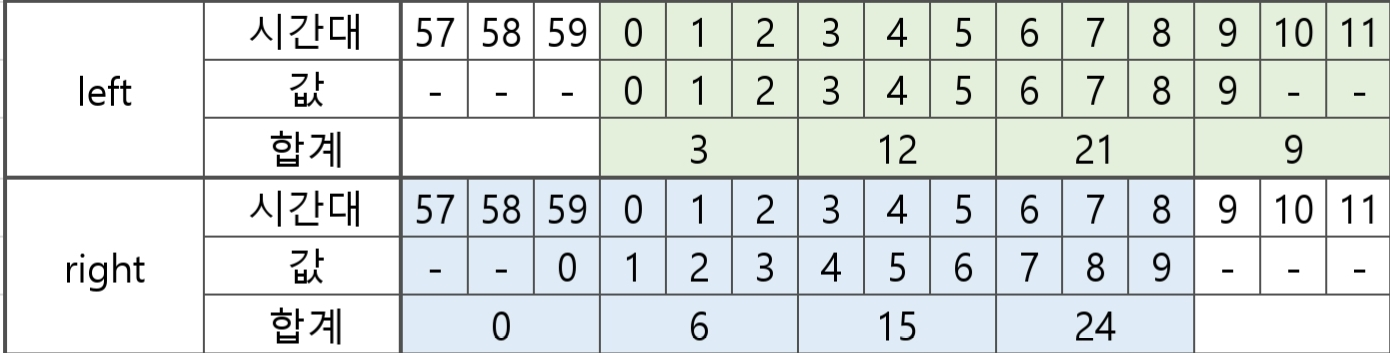

In [338]:
crime_df.resample('M', closed = 'right').sum() # 단순하게 해당 달의 합

,Unnamed: 0,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2012-01-31,915028981,-441593.590846,167133.040452,2660,1569
2012-02-29,927857479,-414510.019595,156885.985057,2353,1629
2012-03-31,939297203,-456901.926876,172941.212239,2869,1528
2012-04-30,958125751,-484935.672244,183549.237636,3070,1595
2012-05-31,1067347781,-534895.215007,202458.825484,3321,1831
...,...,...,...,...,...
2017-05-31,1707510555,-848527.339941,321191.952757,5965,2203
2017-06-30,3100277268,-836254.485703,316549.053532,5972,2076
2017-07-31,3130674345,-836254.770863,316557.607690,6005,2039


In [339]:
crime_df.resample('M', closed = 'left').sum() # 전달의 마지막 날부터 해당 달의 마지막날의까지의 합

,Unnamed: 0,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2012-01-31,882824527,-426478.519706,161411.155706,2566,1519
2012-02-29,930180171,-414614.341923,156926.892601,2354,1627
2012-03-31,941655818,-459211.453596,173814.723623,2874,1546
2012-04-30,952451052,-480632.707103,181919.926379,3049,1573
2012-05-31,1070077299,-535735.739061,202777.300843,3341,1821
...,...,...,...,...,...
2017-05-31,1595544179,-840237.769424,318053.124808,5924,2165
2017-06-30,3108269721,-838981.419626,317582.233232,5995,2077
2017-07-31,3123138982,-835626.820721,316317.923268,5984,2051


In [340]:
import numpy as np
np.sum(crime_df.loc['2012-01-31']) # 915028981 - 882824527 (right - left)

Unnamed: 0                                                      32204454
OFFENSE_TYPE_ID        weapon-carrying-concealedaggravated-assault-dv...
OFFENSE_CATEGORY_ID    all-other-crimesaggravated-assaulttraffic-acci...
GEO_LON                                                    -15115.071139
GEO_LAT                                                      5721.884745
NEIGHBORHOOD_ID        lincoln-parkmar-leebarnumberkeleycherry-creekd...
IS_CRIME                                                              94
IS_TRAFFIC                                                            50
REPORTED_DAY           TuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTues...
dtype: object

In [341]:
np.sum(crime_df.loc['2012-02-29'])

Unnamed: 0                                                      29881762
OFFENSE_TYPE_ID        traffic-accident-hit-and-runtraffic-accidentth...
OFFENSE_CATEGORY_ID    traffic-accidenttraffic-accidentlarcenyall-oth...
GEO_LON                                                    -15010.748811
GEO_LAT                                                        5680.9772
NEIGHBORHOOD_ID        overlandcoleruby-hillwindsorcherry-creekspeerp...
IS_CRIME                                                              93
IS_TRAFFIC                                                            52
REPORTED_DAY           WednesdayWednesdayWednesdayWednesdayWednesdayW...
dtype: object

- label: 리샘플링된 인덱스의 간격을 대표할 값을
간격의 시작값으로할지 끝 값으로할지를 지정하는 것

In [342]:
crime_df.resample('M', label = 'left').sum() # 전달의 마지막 날이 인덱스로 지정

,Unnamed: 0,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2011-12-31,915028981,-441593.590846,167133.040452,2660,1569
2012-01-31,927857479,-414510.019595,156885.985057,2353,1629
2012-02-29,939297203,-456901.926876,172941.212239,2869,1528
2012-03-31,958125751,-484935.672244,183549.237636,3070,1595
2012-04-30,1067347781,-534895.215007,202458.825484,3321,1831
...,...,...,...,...,...
2017-04-30,1707510555,-848527.339941,321191.952757,5965,2203
2017-05-31,3100277268,-836254.485703,316549.053532,5972,2076
2017-06-30,3130674345,-836254.770863,316557.607690,6005,2039


In [343]:
crime_df.resample('M', label = 'right').sum() # 해당 달의 마지막 날이 인덱스로 지정

,Unnamed: 0,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2012-01-31,915028981,-441593.590846,167133.040452,2660,1569
2012-02-29,927857479,-414510.019595,156885.985057,2353,1629
2012-03-31,939297203,-456901.926876,172941.212239,2869,1528
2012-04-30,958125751,-484935.672244,183549.237636,3070,1595
2012-05-31,1067347781,-534895.215007,202458.825484,3321,1831
...,...,...,...,...,...
2017-05-31,1707510555,-848527.339941,321191.952757,5965,2203
2017-06-30,3100277268,-836254.485703,316549.053532,5972,2076
2017-07-31,3130674345,-836254.770863,316557.607690,6005,2039


#### origin, offset
- origin 인수는 리샘플링할 경우 데이터 간격의 원점을 지정
- offset 인수는 origin에 대해서 시간을 더하는 인수

In [344]:
idx = pd.date_range('2021-12-31', periods = 9, freq = '3min')

In [345]:
idx

DatetimeIndex(['2021-12-31 00:00:00', '2021-12-31 00:03:00',
               '2021-12-31 00:06:00', '2021-12-31 00:09:00',
               '2021-12-31 00:12:00', '2021-12-31 00:15:00',
               '2021-12-31 00:18:00', '2021-12-31 00:21:00',
               '2021-12-31 00:24:00'],
              dtype='datetime64[ns]', freq='3T')

In [346]:
df = pd.DataFrame(index = idx, data = [1,2,3,4,5,6,7,8,9], columns = ['col'])

In [347]:
df

,col
2021-12-31 00:00:00,1
2021-12-31 00:03:00,2
2021-12-31 00:06:00,3
2021-12-31 00:09:00,4
2021-12-31 00:12:00,5
2021-12-31 00:15:00,6
2021-12-31 00:18:00,7
2021-12-31 00:21:00,8
2021-12-31 00:24:00,9


In [348]:
df.resample('7min').sum() # 시작 일시부터 7분 간격으로 resampling

,col
2021-12-31 00:00:00,6
2021-12-31 00:07:00,9
2021-12-31 00:14:00,13
2021-12-31 00:21:00,17


In [349]:
df.resample(rule = '7min', origin = 'start_day').sum() # 시작 일시부터 7분 간격으로 resampling

,col
2021-12-31 00:00:00,6
2021-12-31 00:07:00,9
2021-12-31 00:14:00,13
2021-12-31 00:21:00,17


In [350]:
df.resample(rule = '7min', origin = 'start').sum() # 시작 일시부터 7분 간격으로 resampling, start_day와 동일

,col
2021-12-31 00:00:00,6
2021-12-31 00:07:00,9
2021-12-31 00:14:00,13
2021-12-31 00:21:00,17


In [351]:
df.resample(rule = '7min', origin = 'epoch').sum()  # 1970-01-01을 기준으로 7분 간격의 resampling

,col
2021-12-30 23:55:00,1
2021-12-31 00:02:00,5
2021-12-31 00:09:00,15
2021-12-31 00:16:00,15
2021-12-31 00:23:00,9


In [352]:
df.resample(rule = '7min', origin = 'end').sum()  # 마지막 일시부터 7분 간격으로 resampling, end_day와 동일

,col
2021-12-31 00:03:00,3
2021-12-31 00:10:00,7
2021-12-31 00:17:00,11
2021-12-31 00:24:00,24


In [353]:
df.resample(rule = '7min', origin = 'end_day').sum()  # 마지막 일시부터 7분 간격으로 resampling

,col
2021-12-31 00:05:00,3
2021-12-31 00:12:00,12
2021-12-31 00:19:00,13
2021-12-31 00:26:00,17


In [354]:
df.resample(rule = '7min', origin = '2021-12-30').sum()  # 2021-12-30 을 기준으로 7분 간격의 resampling

,col
2021-12-30 23:55:00,1
2021-12-31 00:02:00,5
2021-12-31 00:09:00,15
2021-12-31 00:16:00,15
2021-12-31 00:23:00,9


In [355]:
df.resample(rule = '7min', offset = '4min').sum()  # 00:04:00 기준으로 리샘플링이 진행됐기 때문에, 00:04:00에서 7min을 뺀 23:57부터 리샘플링이 진행

,col
2021-12-30 23:57:00,3
2021-12-31 00:04:00,7
2021-12-31 00:11:00,11
2021-12-31 00:18:00,24


#### df.shift()
- periods : 이동할 기간
- freq : 입력 할 경우 인덱스가 이동
- fill_value : shift로 인해 생긴 결측치를 대체할 값

In [356]:
period_crime = crime_df.shift(periods = 2, axis = 0, fill_value = '-' ) # 행 방향으로 2개씩 옮기고 결측치는 지정한 문자열'-' 로 채움

In [357]:
period_crime

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DAY
REPORTED_DATE,,,,,,,,,
2014-06-29 02:01:00,-,-,-,-,-,-,-,-,-
2014-06-29 01:54:00,-,-,-,-,-,-,-,-,-
2014-06-29 02:00:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1,Sunday
2014-06-29 02:18:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.88466,39.738702,east-colfax,1,0,Sunday
2014-06-29 04:17:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0,Sunday
...,...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460904,public-peace-other,public-disorder,-104.977033,39.737631,capitol-hill,1,0,Tuesday
2017-09-12 20:37:00,460905,forgery-poss-of-forged-inst,white-collar-crime,-104.991137,39.785432,globeville,1,0,Tuesday
2017-09-12 16:32:00,460906,burglary-business-by-force,burglary,-105.03384,39.762365,west-highland,1,0,Wednesday


In [358]:
period_crime_1 = crime_df.shift(periods = 2, freq = 'D', axis = 0 ) # 2일씩 데이터가 shift 됨 

In [359]:
period_crime_1

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DAY
REPORTED_DATE,,,,,,,,,
2014-07-01 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1,Sunday
2014-07-01 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0,Sunday
2014-07-01 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0,Sunday
2014-07-01 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0,Sunday
2014-07-01 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0,Sunday
...,...,...,...,...,...,...,...,...,...
2017-09-15 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0,Wednesday
2017-09-14 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0,Tuesday
2017-09-14 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0,Tuesday


In [360]:
period_crime_2 = crime_df.shift(periods = 2, freq = 'M', axis = 0 ) # 2년씩 데이터가 shift 됨

In [361]:
period_crime_2

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DAY
REPORTED_DATE,,,,,,,,,
2014-07-31 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1,Sunday
2014-07-31 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0,Sunday
2014-07-31 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0,Sunday
2014-07-31 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0,Sunday
2014-07-31 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0,Sunday
...,...,...,...,...,...,...,...,...,...
2017-10-31 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0,Wednesday
2017-10-31 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0,Tuesday
2017-10-31 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0,Tuesday


#### to_period
- DatetimeIndex를 PeriodIndex로 변환하는 메서드 

In [362]:
crime_df.to_period("Y") # 인덱스를 년도만 출력하는 periodindex로 변경

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DAY
REPORTED_DATE,,,,,,,,,
2014,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1,Sunday
2014,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0,Sunday
2014,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0,Sunday
2014,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0,Sunday
2014,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0,Sunday
...,...,...,...,...,...,...,...,...,...
2017,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0,Wednesday
2017,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0,Tuesday
2017,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0,Tuesday


In [363]:
crime_df.to_period('M') # 인덱스를 월까지만 출력하는 periodindex로 변경

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DAY
REPORTED_DATE,,,,,,,,,
2014-06,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1,Sunday
2014-06,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0,Sunday
2014-06,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0,Sunday
2014-06,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0,Sunday
2014-06,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0,Sunday
...,...,...,...,...,...,...,...,...,...
2017-09,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0,Wednesday
2017-09,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0,Tuesday
2017-09,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0,Tuesday


In [364]:
crime_df.to_period('W')  # 인덱스를 일주일의 시작과 끝으로 출력하는 periodindex로 변경

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DAY
REPORTED_DATE,,,,,,,,,
2014-06-23/2014-06-29,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1,Sunday
2014-06-23/2014-06-29,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0,Sunday
2014-06-23/2014-06-29,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0,Sunday
2014-06-23/2014-06-29,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0,Sunday
2014-06-23/2014-06-29,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0,Sunday
...,...,...,...,...,...,...,...,...,...
2017-09-11/2017-09-17,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0,Wednesday
2017-09-11/2017-09-17,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0,Tuesday
2017-09-11/2017-09-17,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0,Tuesday


In [365]:
crime_df.to_period('H')  # 인덱스를 hour까지만 출력하는 periodindex로 변경

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_DAY
REPORTED_DATE,,,,,,,,,
2014-06-29 02:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1,Sunday
2014-06-29 01:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0,Sunday
2014-06-29 02:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0,Sunday
2014-06-29 02:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0,Sunday
2014-06-29 04:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0,Sunday
...,...,...,...,...,...,...,...,...,...
2017-09-13 05:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0,Wednesday
2017-09-12 20:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0,Tuesday
2017-09-12 16:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0,Tuesday
